<a href="https://colab.research.google.com/github/syou001/Data_Analysis/blob/main/chipotle_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.2 멕시코풍 프렌차이즈 chipotle 주문 데이터 분석

##<Step1. 탐색> : 데이터의 기초 정보 살펴보기
**[Chipotle 데이터셋의 기본 정보]**

In [5]:
import pandas as pd

#read_csv 함수로 데이터 DataFrame으로 불러온다.
path = '/content/drive/MyDrive/수연/study/python-data-analysis/data/chipotle.tsv'
chipo = pd.read_csv(path, sep='\t')

In [6]:
print(chipo.shape)

(4622, 5)


In [7]:
print(chipo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


**[Chipotle 데이터셋의 행과 열, 데이터]**

In [9]:
#chipo dataframe에 순서대로 5개의 row 데이터 보여준다.
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [10]:
#chipo dataframe의 column명을 보여준다.
print(chipo.columns)
print('----------------------')
#chipo index의 갯수와 시작 행의 수와 끝행의 수를 보여준다.
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')



---



*데이터의 수치적 특징 탐색을 위한 간단한 질문 정의*


*   quantity와 item_price의 요약 통계
*   order_id와 item_name의 개수



**[chipotle 데이터셋의 수치적 특징 파악]**

*describe 함수로 요약 통계량 출력*


In [12]:
#order_id는 숫자의 의미가 없으므로 string으로 변환
chipo['order_id']=chipo['order_id'].astype(str)

In [13]:
#chipo dataframe에서 수치형 피처들의 요약 통계량 확인
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000




---



*unique 함수로 범주형 피쳐 갯수 출력하기*

In [15]:
#order_id의 값이 어떻게 있는지 갯수 : 1834명이 order
print(len(chipo['order_id'].unique()))
#item_name의 개수를 출력 : 50
print(len(chipo['item_name'].unique()))

1834


In [17]:
print(len(chipo['item_name'].unique()))

50




---



##<step2. 인사이트의 발견> : 탐색, 시각화

*인사이트 발견 할 수 있을만한 개념적 질문 정의*


*   가장 많이 주문한 item이 무엇인지
*   item당 주문의 총량은 얼마인지



**[가장 많이 주문한 item]**

In [36]:
#가장 많이 주문한 item : top 10 출력
#value_counts():unique값 당 갯수 카운트
#iteritems()는 '키'와 '값'의 쌍을 iterator(반복자)로 반환
item_count=chipo['item_name'].value_counts()[:10]
for idx,(val,cnt) in enumerate(item_count.iteritems(),1):
  print('Top', idx,':', val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [41]:
chipo['item_name'].value_counts().index.tolist()[0]

'Chicken Bowl'



---



**[item당 주문 개수와 총량 구하기]**

In [45]:
#item당 주문 개수 출력
order_count=chipo.groupby('item_name')['order_id'].count()
order_count

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [48]:
#item당 주문 총량을 출력
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123




---



**[시각화로 분석 결과 살펴보기]**
-지금까지의 분석 결과를 간단한 시각화로 표현

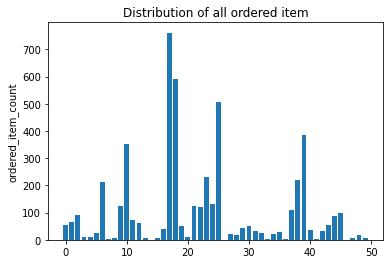

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


item_name_list = item_quantity.index.tolist()
x_post = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_post, order_cnt, align='center')

plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')
plt.show()

##<step3. 데이터 전처리>

**[apply와 lambda 함수를 이용한 데이터 전처리]**

In [54]:
print(chipo.info())
print('--------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
--------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [ ]:
# column단위 데이터에 apply 함수로 전처리 적용
chipo['item_price']=chipo['item_price'].apply(lambda x: float(x[1:]))

chipo.describe()

In [61]:
chipo['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

##<step4. 탐색적 분석>

*데이터를 이해하기 위한 조금 더 복잡한 질문들로 탐색적 데이터 분석*


*   주문당 편균 계산금액 출력하기
*   한 주문에 10달러 이상 사용한 주문의 id 출력하기
*   각 아이템의 가격 구하기
*   가장 비싼 주문에서 item이 몇개 팔렸는지 구하기
*   'Veggie Salad Bowl'이 몇번 주문되었는지 구하기
*   'Chicken Bowl'을 2개 이상 주문한 주문 횟수 구하기





**[주문당 평균 계산금액 출력하기]**

In [68]:
#주문당 평균 계산금액 출력
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [69]:
chipo.groupby('order_id')['item_price'].sum().describe()[:10]

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64



---



**[한 주문에 10달러 이상 사용한 주문번호(id)출력하기]**

In [75]:
#한 주문에 10달러 이상 사용한 id 출력
chipo_orderid_group = chipo.groupby('order_id').sum()
result = chipo_orderid_group[chipo_orderid_group.item_price>=10]

print(result[:10])
print(result.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']




---



**[각 아이템의 가격 구하기]**

In [77]:
#각 아이템의 가격 계산
chipo_one_item = chipo[chipo.quantity==1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by='item_price', ascending=False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


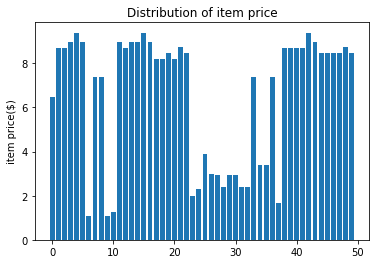

In [79]:
#아이템 가격 분포 그래프 출력
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price=price_per_item['item_price'].tolist()

plt.bar(x_pos,item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')

plt.show()

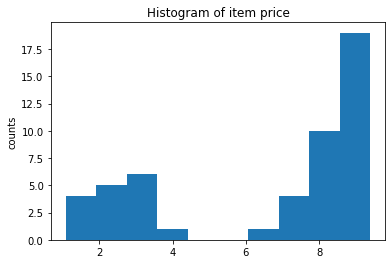

In [80]:
#아이템 가격 히스토그램을 출력
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()



---



**[가장 비싼 주문에서 item이 총 몇개 팔렸는지 구하기]**

In [83]:
#가장 비싼 주문에서 item이 총 몇개 팔렸는지 계산
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30




---



**['veggie salad bowl'이 몇번 주문되었는지 구하기]**

In [86]:
#'veggie salad bowl'이 몇 번 주문되었는지 계산
chipo_salad = chipo[chipo['item_name']=='Veggie Salad Bowl']
#한ㄴ 주문 내에서 중복 집계된 item_name 제거
chipo_salad=chipo_salad.drop_duplicates(['item_name', 'order_id'])

print(len(chipo_salad))
chipo_salad.head()

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


**['chicken bowl'을 2개 이상 주문한 주문 횟수 구하기]**

In [91]:
#'chicken bowl'을 2개 이상 주문한 주문 횟수 구함
chipo_chicken = chipo[chipo['item_name']=='Chicken Bowl']
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum>=2]

print(len(chipo_chicken_result))
chipo_chicken_result.head()

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64